In [1]:
#HIDDEN
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import html
from IPython.display import display, HTML
from IPython.display import Markdown as md
import math


In [37]:
#HIDDEN
from bokeh.plotting import Figure, output_file, show
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import Figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.io import  show
from bokeh.plotting import figure
from bokeh.models import Range1d, PanTool, ResetTool, HoverTool
from bokeh.layouts import row
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

In [3]:
#HIDDEN
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider, Label, FloatSlider
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
from IPython.display import Markdown as md
from ipywidgets import AppLayout

In [4]:
#HIDDEN
CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [5]:
#HIDDEN
pd.set_option("mode.chained_assignment", None)

In [6]:
#HIDDEN
sns.set(style="darkgrid")


#####  The idea of the project is to create standalone shareable  HTML file, with interactive value model, interactive tables and graphs,    instead of boring static reports. The file is possible to share,  for example to send by e-mail …  end user can enter manually data into the value models  

#####  This file does not require a server ( but require internet )  , it is a static HTML with  interactive applications  : the value model №2 is a JS application,  in tables is possible to move columns and sort values , in Bokeh graphs possible to adjust scale and to see interactive values 

##### application #1 is using Binder servers as the computational backend and very slow... 

##### The report was created in  Jupiter Notebook and written in Python  , except the cost model №2,  was  converted to HTML by nbinteract.
###### For visualization were used Bokeh, Seaborn, Matplotlib  


![ds](https://cdn.app.compendium.com/uploads/user/e7c690e8-6ff9-102a-ac6d-e4aebca50425/323badff-4461-4704-aef8-ff52e06dc373/File/7c9acfee9d9ab2190e87a6052b9aba87/data_science_vs__big_data_vs.jpg )

In [7]:
#HIDDEN
df = pd.read_excel('Book1.xlsx')

In [8]:
#HIDDEN
df2 = pd.read_excel('Book3.xlsx')

In [9]:
#HIDDEN
df1 = pd.read_excel('Book2.xlsx')

<h2><center>Отчет по испытаниям интенсификатора  XS   и экономическое обоснование. АО NaN</center></h2>

#### Цель испытаний:

Подбор добавки-интенсификатора, способной повысить раннюю прочность цемента, не менее чем на 4 МПа, с целью производства высокомарочных типов цемента, создания конкурентного преимущества на рынке производителей цемента N Региона Finland и получения дополнительной маржинальной прибыли.

#### Краткое описание :

В период март - апрель года на АО NaN были проведены длительные промышленные испытания интенсификатора (добавки оказывающей влияние на активность) компании X ,  XS,  при производстве цемента ЦЕМ I 42.5Н на цементной мельнице в замкнутом цикле помола. На регулярной основе завод использует интенсификатор XE.

#### Основные выводы( по сравнению с цементом без интенсификатора и с X):

  - Увеличение ранней прочности(2 сут)  на сжатие,    составило в среднем = +4 МПа, за счет активации цемента - 3,5 МПа, за счет более тонкого помола-0,5 МПа ,  [п.2-2.3](#section_1).[п.4.1](#section_4).
  
  - Повышение  производительности цементной мельницы c XS   составило в среднем = +9,6%. [п.4](#section_2).
  - Повышение ранней прочности цемента с XS  происходит на химическом уровне и не связано с активностью клинкера и изменением тонкости помола.[п.3.1](#section_3).
 
  - Средняя 2-х суточная  прочность цемента с добавкой XS   составила 23,6 MPa, расчетные показатели тонкости помола             и производительности мельницы показывают, что за счет более тонкого помола, снижение часовой производительности,   цемент с заданной  прочностью без XS   произвести невозможно.[п.4.1](#section_4).
  
  



#####  Суммарный экономический эффект применения XS  составит более 800 млн рублей  прибыли   в год при производстве высокомарочных цементов в объеме 300 тыс тонн. 

Ограничения отчета:
    
    - отсутствие данных фи-мех.испытаний при дозировке X - 450 g/t 
    
    

#### 1. Экономический расчет

Экономическая модель предполагает, что для производства высокомарочного цемента с ранней прочностью 26 МПа существуют 2 альтернативы: 
1.	Использование специальной добавки – активатора цемента (XS).
Затраты в данном случае – стоимость добавки. 
2.	 Производство цемента без добавки, но с понижением производительности цементной мельницы. 
Затраты в данной альтернативе – дополнительный расход электроэнергии и дополнительный износ мелящих тел.  



Разница на затраты при сравнении двух подходов и будет экономическим эффектом. Расчет является теоретическим, т.к в реальных условиях, длительно  достичь тонкость помола на сите R0045 равного 0, в данной системе помола  практически невозможно.

Экономическая модель также учитывает повышение производительности с XS.

<h3><center>Расчет экономического эффекта применения XS<center></h3>

<h4> 1)Adjustable value model with sliders 

In [10]:

#HIDDEN
outputincrease = IntSlider(min=1, max=20 , step =1)
outputincrease1 = FloatText(7)

widgets.jslink((outputincrease, 'value'), (outputincrease1, 'value'))

mineral = IntSlider(min=2, max=6 , step =1)
mineral1 = FloatText(2)

widgets.jslink((mineral, 'value'), (mineral1, 'value'))

pricechange = IntSlider(min=-20, max=20 , step =1)


output1 = FloatText(35)
totpower = FloatText(20000)
enercost = FloatText(3.2)
rm_cost = FloatText(20)

clinkercost = FloatText(1700)
slag_cost = FloatText(300)
price = FloatText(45000)
price1 = FloatText(120000)
dosage = FloatText(250)
dosage1 = FloatText(250)
name = widgets.Text('X')
name1 = widgets.Text('XS')

def hd(name):
    
       return widgets.HTML(
       value= name,
    
       justify_content='center',
       align_self= 'center') 


                
def benefit_ga (outputincrease , enercost,rm_cost,dosage,price, totpower, output1,  pricechange ):
    
            pricech = price * (1+ pricechange/100)
            
            output2 = output1 + (output1/100* outputincrease )
            c = totpower/output1*enercost +rm_cost -  totpower/output2 *enercost - output1/output2*rm_cost-(dosage*pricech/1000000)
            print (round(c,1))
            



def benefit_qi (outputincrease , enercost,rm_cost,dosage1,price1, totpower, output1, mineral,clinker_cost, slag_cost ):
            
            filler_f = (mineral*slag_cost/100+(100-mineral)*clinker_cost/100)
            
            output2 = output1 + (output1/100* outputincrease )
            c = totpower/output1*enercost +rm_cost +clinker_cost -  totpower/output2 *enercost - output1/output2*rm_cost-(dosage1*price1/1000000) - filler_f
            print (round(c,2))
              

#HIDDEN
pricechangep = '<h4 style = "color:#069" > Процентное изменение цены простого интенсифкатора, %  </h4><left>'

form_item_layout = Layout(
    display='flex',
    #flex_flow='row',
    justify_content='space-between',
    flex='2 1 auto',)
    #align_self= 'center')
    
header2 = widgets.HTML(
    value=" <center> <b>Увеличение производительности, %</b><center>",
    #placeholder='Some HTML',
    #description='Material cost',
     justify_content='center',
    align_self= 'center'
)
header3 = widgets.HTML(
    value=" <center> <b>Ввод минеральных добавок(известняк), %</b><center>",
    #placeholder='Some HTML',
    #description='Material cost',
     justify_content='center',
    align_self= 'center'
)





form_items = [
header2,  
#hd(outputper),
Box([Label(), outputincrease1 ], layout=form_item_layout),
Box([Label(),outputincrease ], layout=form_item_layout),
    header3,  

Box([Label(), mineral  ], layout=form_item_layout),
Box([Label(), mineral1  ], layout=form_item_layout),

hd(pricechangep),

Box([Label(), pricechange  ], layout=form_item_layout),
    
]

b = '<h4 style = "color:#069" > 1. Экономический эффект, Руб. на тонну   </h3><left>'
form_items_effect = [
hd(b),
Box([Label(),  ], layout=form_item_layout), ]
    
    
с = '<h4 style = "color:#069" > 2. Экономический эффект, замещение клинкера, Руб. на тонну   </h3><left>'
form_items_effect1 = [
hd(с),
Box([Label(),  ], layout=form_item_layout),

]
    
# form for header
formh = Box(form_items, layout=Layout(
    #display='flex',
    flex_flow='column',
    border='solid 3px',
    align_items='center',
 
))
    
#form for economic effect left

formef = Box(form_items_effect, layout=Layout(
    #display='flex',
    flex_flow='column',
    #border='solid 3px',
    align_items='flex-start',
 
))

        
#form for economic effect right
    
formef1 = Box(form_items_effect1, layout=Layout(
    #display='flex',
    flex_flow='column',
    #border='solid 3px',
    align_items='flex-end',
 
))

hsize = '40px'


form_items_input   = [

Box([Label(), name], layout=Layout( height='40px')),
Box([Label(), price], layout=Layout( height='40px')),
Box([Label(), dosage  ], layout= Layout( height='40px') ),
Box([Label(), totpower  ], layout= Layout( height='40px')),
Box([Label(), enercost ], layout= Layout( height='40px')),
Box([Label(), rm_cost ], layout= Layout( height='40px')),
Box([Label(), clinkercost ], layout= Layout( height='40px')),
Box([Label(), slag_cost ], layout= Layout( height='40px')),
Box([Label(), output1 ], layout= Layout( height='40px')),    
]



form_items_input2  = [

    
Box([Label(), name1], layout= Layout(height = hsize) ),
Box([Label(), price1], layout= Layout(height = hsize) ),
Box([Label(), dosage1  ], layout=Layout(height = hsize) ),
Box([Label(), totpower  ], layout=  Layout(height = hsize)),
Box([Label(), enercost ], layout= Layout(height = hsize)  ),
Box([Label(), rm_cost ], layout= Layout(height = hsize) ),
Box([Label(), clinkercost ], layout= Layout(height = hsize) ),
Box([Label(), slag_cost ], layout= Layout(height = hsize) ),
Box([Label(), output1 ], layout= Layout(height = hsize) ),    
]


pr  = '<h4 style = "color:#069" > Цена интенсификатора, руб.тонна  </h4><left>'
doz  = '<h4 style = "color:#069" > Дозировка интенсификатора, грамм на тонну  </h4><left>'
po  = '<h4 style = "color:#069" > Мощность главного привода, кВт  </h4><left>'
pre  = '<h4 style = "color:#069" > Цена электроэнергии, руб. за кВт/ч  </h4><left>'
rm  = '<h4 style = "color:#069" > Затраты на ремонт и обслуживание, руб.на тонну цемента  </h4><left>'
ckl  = '<h4 style = "color:#069" > Себестоимость пр-ва клинкера, руб. за тонну  </h4><left>'
pm  = '<h4 style = "color:#069" > Цена минеральных добавок (шлак/известняк), руб. за тонну  </h4><left>'
ou  = '<h4 style = "color:#069" > Производительность мельницы,без интенсиф-ра тонн в час  </h4><left>'
nm  = '<h4 style = "color:#069" > Название добавок - интенсификаторов  </h4><left>'
pricechangep = '<h4 style = "color:#069" > Процентное изменение цены простого интенсифкатора, %  </h4><left>'


benefiter = widgets.interactive_output(benefit_ga, {'rm_cost': rm_cost,'dosage':dosage,'price': price,
                                                   'outputincrease':outputincrease , 
                                                    'enercost': enercost,
                                                    'totpower': totpower , 'output1': output1,
                                                    'pricechange': pricechange})


benefiterqi = widgets.interactive_output(benefit_qi, {'rm_cost': rm_cost,'dosage1':dosage1,'price1': price1,
                                                   'outputincrease':outputincrease , 
                                                    'enercost': enercost,
                                                    'totpower': totpower , 'output1': output1, 
                                                      'mineral': mineral,'clinker_cost' : clinkercost,
                                                      'slag_cost' : slag_cost})

#out = widgets.Output(layout={'border': '1px solid black'})

form_input_desk = [ hd(nm), hd(pr), hd(doz), hd(po), hd(pre), hd(rm), hd(ckl), hd(pm), hd(ou)]

formleft = Box(form_input_desk, layout=Layout(
    #display='flex',
    flex_flow='column',
    border='solid 3px',color = 'green',
    align_items='stretch',

))

formeinput = Box(form_items_input, layout=Layout(
    #display='flex',
    flex_flow='column',
    border='solid 3px',
    align_items='stretch',
 
))

formeinput2 = Box(form_items_input2, layout=Layout(
    #display='flex',
    flex_flow='column',
    border='solid 3px',
    align_items='stretch',
 
))





#words = [ hd(benefitall), benefiter, hd(benefitall1),  benefiterqi]



   

#z  = '<h4 style = "color:#069" > 2. Экономический эффект добавок - интенсификаторов  </h3><left>'
benefitall = '<h4 style = "color:#069" > Экономический эффект простого инт-ра   </h3><left>'
benefitall1 = '<h4 style = "color:#069" > Экономический эффект, повышающий активность  </h3><left>'
words = [hd(benefitall), benefiter, hd(benefitall1),  benefiterqi]  
#header_main = [  hd(benefitall), benefiter, hd(benefitall1),  benefiterqi]

headermain = Box(words, layout=Layout(
    display='flex-wrap',
    flex_flow='column',
    border='solid 3px',
    #border-color = 'green',
    align_items='center',
 
))

AppLayout(header= headermain,
          left_sidebar=formleft,
          center= formeinput,
          right_sidebar= formeinput2 ,
          footer= formh,
          pane_widths=[1, 0.4, 0.4],
          pane_heights=[0.4, 1, '400px'], align_items='top',  grid_gap="5px")


<h4> 2) Value model 2

In [12]:
#HIDDEN
HTML ('''
<iframe src="http://cost-model.com" width=900 height=900>

''')

#### 2.1 Сводная таблица параметров и физ.мех испытаний

In [38]:
#HIDDEN
df_long =pd.read_excel('jk1.xlsx')

df_long.drop(columns = {'Unnamed: 0'}, inplace =True)

dflong = df_long.fillna(method='ffill')

dflong['Date'] = dflong['Date'].dt.strftime('%Y-%m-%d')

Columns = [TableColumn(field=Ci, title=Ci) for Ci in dflong.columns] # bokeh columns
data_table = DataTable(columns=Columns, source=ColumnDataSource(dflong), height = 400, width = 900) # bokeh table
output_file("total.html")
show(data_table)


<a id=’section_1’></a>
#### 2.2 Показатели прочности на сжатие  2-х суточном возрасте , образцов с использованием XS , X и контрольной пробы 


In [14]:
#HIDDEN
dtpldc = pd.read_excel('dtpld_clink.xlsx') 
dtpld = pd.read_excel('dtpld.xlsx') 
dtpld1 = dtpld.merge(dtpldc, how ="left")

In [39]:
#HIDDEN
output_notebook()
Columns = [TableColumn(field=Ci, title=Ci) for Ci in dtpld1.columns] # bokeh columns
data_table = DataTable(columns=Columns, source=ColumnDataSource(dtpld1), height = 500, width = 900) # bokeh table
output_file("quality.html")
show(data_table)

Loading BokehJS ...

<strong>  Описательный анализ 2-х  суточной прочности с XS 

In [16]:
#HIDDEN
dtp = pd.read_excel(r'C:\Users\IKonnov\OneDrive - GCPAT\AAA\2020\Eurocement\Lipetsk\English\dtpld.xlsx', index = False)


In [17]:
#HIDDEN
dtp.drop(columns = "Unnamed: 0", inplace =True)

       2 d cem, Mpa
count     14.000000
mean      23.235714
std        1.024025
min       21.900000
25%       22.200000
50%       23.250000
75%       24.000000
max       24.800000


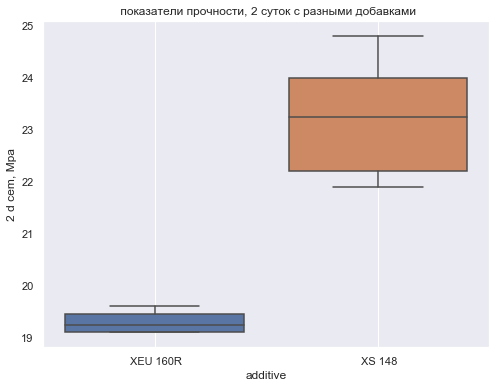

In [18]:
#HIDDEN
df = dtp
plt.figure(figsize=(8, 6))
pl = sns.boxplot(x="additive", y="2 d cem, Mpa", data=df).set_title(" показатели прочности, 2 суток с разными добавками")

xs148 = df[['additive','2 d cem, Mpa']].set_index('additive')
xs148_1 = df[df['additive'] == ' XS 148']
xeu = df[df['additive'] == ' XEU 160R']

a = xs148_1['2 d cem, Mpa'].describe()
b= xeu['2 d cem, Mpa'].describe()

a = pd.DataFrame(data=a)
b = pd.DataFrame(data=b)

print (a)
plt.grid()
plt.show()

<a id='section_1'></a>

<strong> 2.3 Вывод:

In [19]:
#HIDDEN
XEU = b.loc['mean','2 d cem, Mpa']
st148 = a.loc['mean','2 d cem, Mpa']
delta = st148-(XEU)
dk = (XEU)
hj = round(delta,1)
hj1= round(delta/dk *100)

In [20]:
#HIDDEN
md(f"**Среднее увеличение ранней прочности при использовании XS  составило**: {hj} **MPa или {hj1}  % по сравнению с добавкой X**")

**Среднее увеличение ранней прочности при использовании XS  составило**: 3.9 **MPa или 20.0  % по сравнению с добавкой X**

In [21]:
#HIDDEN
med = xs148_1['2 d cem, Mpa'].median()-xeu['2 d cem, Mpa'].median()
med = round(med, 2)
med1 = round (med/ xs148_1['2 d cem, Mpa'].median()*100)

md(f"**Медианное увеличение ранней прочности при использовании XS  составило  =** {med} **MPa ( {med1}% % по сравнению с добавкой X)**")

**Медианное увеличение ранней прочности при использовании XS  составило  =** 4.0 **MPa ( 17% % по сравнению с добавкой X)**

Медианное увеличение считается более корректным показателем прочности, т.к не не принимает в расчет выбросы 

#### 3. Корреляционная матрица,  Корреляции Пирсона между прочностью на сжатие ( 2 суток) и остальными параметрами. 

In [40]:
#HIDDEN
dk = dtpld1.corr()['2 D'].sort_values()
dfk = pd.DataFrame(data=dk)
dfk.reset_index(inplace =True)
dfk.rename(columns= {'index':'parameters', "2 D": "pearson"}, inplace =True)

dfk = dfk.drop([2,6,8,7])
dfk.sort_values(by = 'pearson', ascending  = False, inplace = True )
dfk = round(dfk,(2))
dfk.pearson = dfk.pearson.astype(str)
x  = dfk['parameters']
y = dfk['pearson']
source = ColumnDataSource(data=dfk)
p = figure(x_range=x, plot_height=350,plot_width=650,background_fill_color= '#F0F8FF', toolbar_location=None, title=" 2 days MPa correlation with other parameters")
p.vbar(x='parameters',  top = 'pearson', width=0.4, source=source, legend_field="parameters",
       line_color='black', fill_color=factor_cmap('parameters', palette=Spectral6, factors= x))
p.xgrid.grid_line_color = "lightgray"
p.y_range.start = -1
p.y_range.end = 1.5
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
p.tools = [PanTool(),ResetTool()]
hover = HoverTool(tooltips = ('@pearson'))
p.add_tools(hover)

   
p.toolbar_location = 'above'
p.toolbar.logo = None
output_file("corr.html")
output_notebook()
show(p)

Loading BokehJS ...

Коэффициент корреляции показывает тесноту линейной взаимосвязи и изменяется в диапазоне от -1 до 1. -1 (минус один) означает полную (функциональную) линейную обратную взаимосвязь. 1 (один) – полную (функциональную) линейную положительную взаимосвязь. 0 – отсутствие линейной корреляции (но не обязательно взаимосвязи). Значения от 0 до 0,3 (от 0 до -0,3) указывают на слабую положительную (отрицательную) линейную связь. Значения от 0,3 до 0,7 (от 0,3 до -0,7) указывают на умеренную положительную (отрицательную) линейную взаимосвязь. Значения от 0,7 до 1,0 (от -0,7 до -1,0) указывают на сильную положительную (отрицательную) линейную зависимость.

<a id='section_3'></a>
<strong>  3.1 В данной выборке существует зависимость качественных показателей цемента от следующих параметров: 1- дозировка, 2- остоток на сите. Менее всего 2-х суточная прочность коррелируется с  удельной поверхностью и актвностью клинкера. 
   

##### Вывод: 2-х суточная прочность цемента выросла за счет актвации клинкера XS  и более тонкого помола

#### 3.2 Коэффициенты корреляции и уровень значимости 

#### Зависимость 2 суточной прочности на сжатие и остатке на сите 0045 и 008

<strong> Вывод: 2 - х суточная прочность образцов очень  зависит от тонкости помола, в данном случае от  показателя остаток на сите 0045, уверенность в этом - 99% 

#### Зависимость 2 суточной прочности на сжатие и остатке на сите 008

In [41]:
#HIDDEN
from sklearn.linear_model import LinearRegression
from bokeh.io import output_notebook, show
from bokeh.models import Slope

# Data
df1 = dtpld1[['R 0045, %', '2 D']]
df2 = dtpld1[['R 008, %', '2 D']]
y =dtpld1["2 D"]
x = dtpld1[['R 0045, %']]
b=dtpld1["2 D"]
a = dtpld1[['R 008, %']]

source = ColumnDataSource(df1)
source1 = ColumnDataSource(df2)
# Make and fit a linear regression model
model = LinearRegression().fit(x,y)
model1 =  LinearRegression().fit(a,b)


# Find the slope and intercept from the model
slope = model.coef_[0]
slope1 = model1.coef_[0] # Takes the first element of the array
intercept = model.intercept_
intercept1 = model1.intercept_

# Make the regression line
regression_line = Slope(gradient=slope, y_intercept=intercept, line_color='red', line_dash='dashed', line_width=2, line_alpha=0.6)
regression_line1 = Slope(gradient=slope1, y_intercept=intercept1, line_color='red', line_dash='dashed', line_width=2, line_alpha=0.6)

# Plot the data and regression line
fig=figure(plot_width=400, plot_height=400, background_fill_color= '#F0F8FF', toolbar_location= None, title=" 2 days MPa and R 0045")
fig1=figure(plot_width=400, plot_height=400, background_fill_color= '#F0F8FF', toolbar_location= None, title=" 2 days MPa and R 008")
fig.circle( x="R 0045, %", y="2 D", source = source,legend_label = "2d compressive strenght", color="blue", fill_color="white", size =12)
fig1.circle( x="R 008, %", y="2 D", source = source1,legend_label = "2d compressive strenght", color="blue", fill_color="white", size =12)
fig.add_layout(regression_line)
fig1.add_layout(regression_line1)


fig.legend.orientation = "horizontal"
fig.legend.location = "top_right"
fig.tools = [PanTool(),ResetTool()]
fig.toolbar.logo = None 
fig.toolbar_location = 'above'
fig1.legend.orientation = "horizontal"
fig1.legend.location = "top_right"
fig1.tools = [PanTool(),ResetTool()]
fig1.toolbar.logo = None 
fig1.toolbar_location = 'above'
hover = HoverTool(tooltips = [('2 days:','@{2 D}')])

fig.add_tools(hover)
fig1.add_tools(hover)
fig1.x_range.start = 1
fig1.x_range.end = 4
p = row(fig,fig1)
output_file("corr2.html")
show(p)

In [24]:
#HIDDEN
df = pd.read_excel('Book1.xlsx')
pearson_coef, p_value = stats.pearsonr(df['R 008'], df['2 суток'])
print("К Pearson",round(pearson_coef,3), "  P value =", round (p_value,6))
print ( round ((0.1-p_value)*1000, 2), "% уверенности в том, что корреляция между R008 и прочностью 2D значима")

#HIDDEN
df = pd.read_excel('Book1.xlsx')
pearson_coef, p_value = stats.pearsonr(df['R 0045'], df['2 суток'])
print("К Pearson",round(pearson_coef,3), "  P value =", round (p_value,6))
print ( round ((0.1-p_value)*1000, 2), "% уверенности в том, что корреляция между R0045 и прочностью 2D значима")

К Pearson -0.866   P value = 3e-05
99.97 % уверенности в том, что корреляция между R008 и прочностью 2D значима
К Pearson -0.786   P value = 0.000513
99.49 % уверенности в том, что корреляция между R0045 и прочностью 2D значима


<strong>Вывод: 2 - х суточная прочность образцов  зависит от тонкости помола,  уверенность в этом - 99,97
    %

<h2><center>Параметры работы цементной мельницы</center></h2>

In [25]:
#HIDDEN
mill148=pd.read_excel('millXS148.xlsx')
mill = pd.read_excel('mill_160r.xlsx')
mill.dropna(inplace =True)
mill148.dropna(inplace=True)
a = ['Применение интенсификатора помола','Шибер сепаратора ( открытие), %','Δ P рук. фильтр сепаратор, mbar','Нагрузка на двигатель цирк. вент., А','Температура цемента после сепаратора, ᵒС','Нагрузка на привод сепаратора, А','Нагрузка на асп. вент ЦМ, А']
mill.drop(columns=a, inplace = True)
mill148.drop(columns=a, inplace = True)
millap=mill
millap2=mill148
mill.drop(columns ='Дозировка интенсификатора помола, гр/т', inplace =True)
mill148.drop(columns='Дозировка интенсификатора помола, гр/т', inplace = True)

def cl(a):
    df = pd.DataFrame(data=a.mean())
    df.rename(columns ={0:'среднее значение'}, inplace =True)
    df.reset_index(inplace =True)
    df.rename(columns ={'index':'параметр'}, inplace =True)
    return df
mill_160 = cl(mill)
mill148 = cl(mill148)
mill_merged = mill_160.merge(mill148, on='параметр')
mill_merged = mill_merged.rename(columns = {'среднее значение_x':'с добавкой XEU 160R', 'среднее значение_y':'с добавкой XS 148'})
mill_merged['разница']=mill_merged['с добавкой XS 148']-mill_merged['с добавкой XEU 160R']
mill_merged['разница %']= round((mill_merged['разница']/ mill_merged['с добавкой XEU 160R'] *100),1)
mill_merged['разница абсолютная']= mill_merged['разница'].abs()

<h4><center>4.Сравнение средних параметров работы мельницы за период с разными интенсификаторами

In [42]:
#HIDDEN
mill_mergedrus= pd.read_excel('mill_merged.xlsx', index = False)

mill_mergedrus.drop(columns = {'Unnamed: 0'}, inplace = True)

mill_mergedrus = round(mill_mergedrus, (2))

output_notebook()
Columns = [TableColumn(field=Ci, title=Ci) for Ci in mill_mergedrus.columns] # bokeh columns
data_table = DataTable(columns=Columns, source=ColumnDataSource(mill_mergedrus), height = 400, width = 500) # bokeh table
output_file("parrus.html")
show(data_table)

Loading BokehJS ...

In [27]:
#HIDDEN
mill_merged.rename(columns = {'с добавкой XEU 160R': 'с добавкой X', 'с добавкой XS 148': 'с добавкой XS' }, inplace =True)

In [28]:
#HIDDEN
mill_merged.sort_values(by = ['разница абсолютная'], ascending = False, inplace =True )
mill_merged.drop(columns = 'разница абсолютная', inplace =True)

In [29]:
#HIDDEN
mill_m = mill_merged.drop(columns = ['разница %','разница'])
mill_m=mill_m.sort_values(by = ['с добавкой X'])
mill_m.set_index('параметр', inplace =True)
result = mill_m

In [30]:
#HIDDEN
ld = ('Температура цемента после мельницы, °C','Separ, r/min%','Подача Гипс, т/ч','SO3, %','Нагрузка на гл. привод, А','Уд.поверх (ПСХ), м²/кг','Количество добавок, %' )

In [31]:
#HIDDEN
n = result.div(result.sum(1), axis=0)
n.sort_values(by = ['с добавкой XS'], ascending =False, inplace =True)
n.reset_index(inplace =True)
n['параметр'].replace(ld,np.nan, inplace = True)
n.dropna(inplace =True)
n.set_index('параметр', inplace =True)

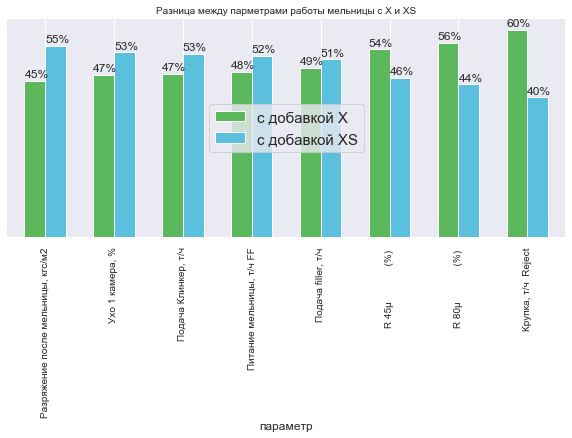

In [32]:
#HIDDEN
colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax = n.plot(kind='bar',figsize=(10,4),width = 0.6,color = colors_list, edgecolor=None)
plt.legend(labels=n.columns,fontsize= 15, loc =10)
plt.title("Разница между парметрами работы мельницы с X и XS",fontsize= 10)
plt.xticks(fontsize=10)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

<h4> 4.1 Формула приведения прочности по остатку на сите R45


 $$ f  = \frac{Δ MPa}{0,35}  $$ 

   [*Сыллка на источник:  "Lea's Chemistry of Cement and Concrete",Peter C. Hewlett ](https://urldefense.com/v3/__https://www.sciencedirect.com/book/9780750662567/leas-chemistry-of-cement-and-concrete__;!!Nng1tRU!renxfVi5EtpS-5cDfC9MrSLsxYg9GVKaG9mOp5n-ndrj41P027_af3mJPZQp8_uFYg$ )

In [33]:
#HIDDEN
mill_dif =xeu['R 0045'].mean()- xs148_1['R 0045'].mean()
mill_dif1 = round((mill_dif*0.35),1)
dif2 = hj-mill_dif1 

In [34]:
#HIDDEN
md(f"**Вывод :Увеличение прочности за счет более тонкого помола цемента с XS   составило {mill_dif1} MPa , т.е за счет активации цемента добавкой XS увеличение ранней прочности составило 3,5 MPa.**")

**Вывод :Увеличение прочности за счет более тонкого помола цемента с XS   составило 0.5 MPa , т.е за счет активации цемента добавкой XS увеличение ранней прочности составило 3,5 MPa.**

In [35]:
#HIDDEN
st = round (( 3.5 /0.35),1)

In [36]:
#HIDDEN
md(f'**Для увеличения ранней прочности цемента на {dif2} Мпа, необходимо снизить остаток на сите R45 на  {st} , т.е  9 минус {st}**' )

**Для увеличения ранней прочности цемента на 3.4 Мпа, необходимо снизить остаток на сите R45 на  10.0 , т.е  9 минус 10.0**

<a id='section_4'></a>
##### Основной вывод: произвести цемент с ранней прочностью 23 MPa   без XS  за счет снижения производительности мельницы  не представляется возможным